In [258]:
import numpy as np
import matplotlib as plt

path = 'run/'+'lphi4_inflation_PS'+'/'
f_star = 5.19441e19
omega_star = np.sqrt(1e-9)*f_star
M_p = 2.435e18

import numpy as np
import matplotlib.pyplot as plt

# Function to process the file and extract columns
def read_and_process_file(file_path):
    with open(file_path, 'r') as f:
        # Read the entire file and split into lines
        lines = f.readlines()
    
    # Convert each line to a list of floats (each line is a row)
    data = [list(map(float, line.split())) for line in lines]
    
    # Transpose to columns
    return list(zip(*data))  # Each column is now a list

# Read and process the data
avg_scalar = read_and_process_file(path + 'average_scalar_0.txt')
avg_sf = read_and_process_file(path + 'average_scale_factor.txt')
avg_energies = read_and_process_file(path + 'average_energies.txt')
avg_energies_conservation = read_and_process_file(path + 'average_energy_conservation.txt')

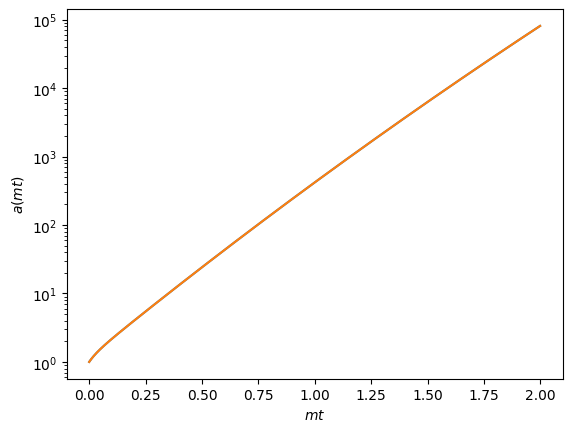

In [259]:
from scipy.interpolate import UnivariateSpline

t = avg_sf[0]
a = avg_sf[1]
a_t = UnivariateSpline(t, a, s=0)
plt.figure()
plt.plot(t,a)
plt.plot(t,a_t(t))
plt.xlabel('$mt$')
plt.ylabel('$a(mt)$')
plt.yscale('log')
plt.show()


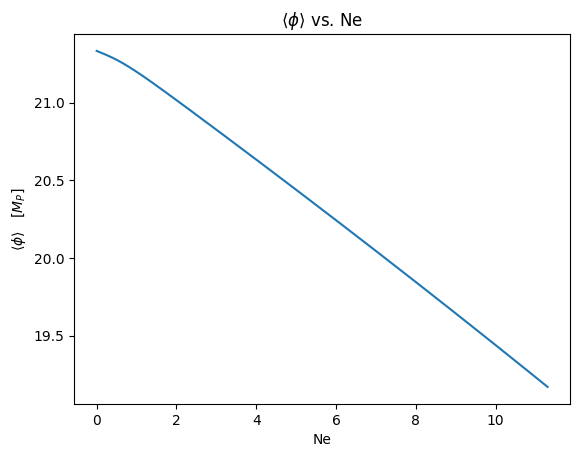

In [260]:
phi = np.array(avg_scalar[1]) * f_star/M_p
dphi = np.array(avg_scalar[2]) * f_star * omega_star
dphi_t = UnivariateSpline(t,dphi,s=0)

plt.figure()
plt.plot(np.log(a), phi)
plt.xlabel(r'Ne')
plt.ylabel(r'$\langle\phi\rangle\quad [M_P]$')
plt.title(r'$\langle\phi\rangle$ vs. Ne')
plt.show()

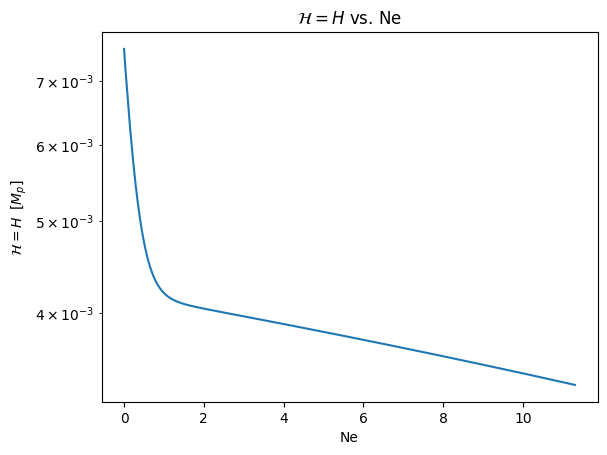

In [261]:
Hubble = np.array(avg_sf[3]) * omega_star/M_p
Hubble_t = UnivariateSpline(t,Hubble,s=0)

plt.figure()
plt.plot(np.log(a), Hubble)
plt.xlabel(r'Ne')
plt.ylabel(r'$\mathcal{H}=H\;\; [M_p]$')
plt.title(r'$\mathcal{H}=H$ vs. Ne')
plt.yscale('log')
plt.show()

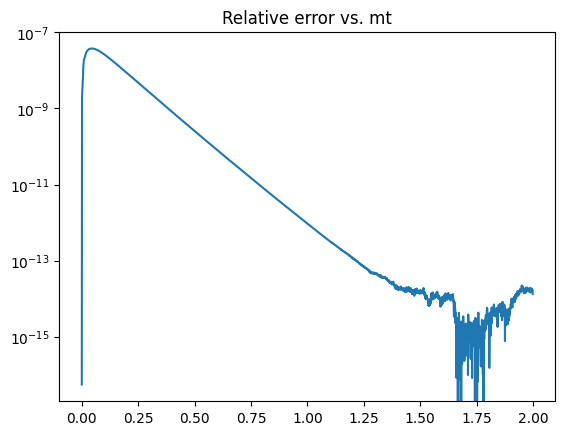

In [262]:
plt.figure()
#plt.plot(np.log(a), Hubble_eq10RHS)
plt.plot(avg_energies_conservation[0], np.abs(avg_energies_conservation[1]))
plt.title(r'Relative error vs. mt')
plt.yscale('log')
plt.show()

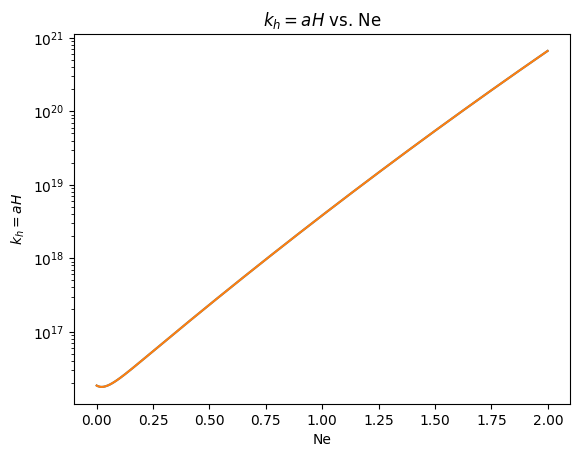

In [263]:
kh = Hubble * a * M_p

kh_t = UnivariateSpline(t, kh, s=0)
plt.figure()
plt.xlabel(r'Ne')
plt.ylabel(r'$k_h=aH$')
plt.title(r'$k_h=aH$ vs. Ne')
plt.plot(t,kh)
plt.plot(t,kh_t(t))
plt.yscale('log')
plt.show()

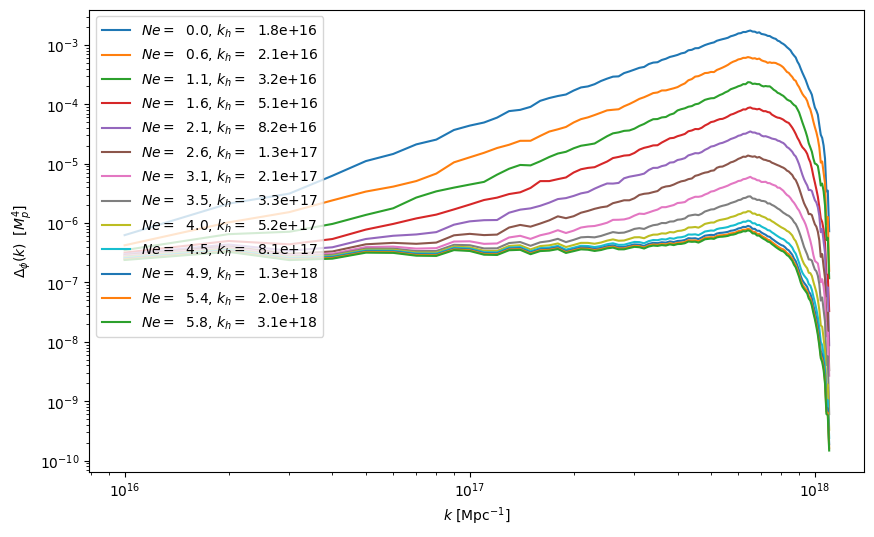

In [264]:
import matplotlib.pyplot as plt

# File paths to your data files
file_path = path + 'spectra_scalar_0.txt'
time_file_path = path + 'average_spectra_times.txt'

# Function to read blocks from the data file
def read_blocks(file_path):
    with open(file_path, 'r') as f:
        blocks = f.read().strip().split("\n\n")
    return [block.strip() for block in blocks]

# Function to read the times from the time file
def read_times(time_file_path):
    with open(time_file_path, 'r') as f:
        times = [float(line.strip()) for line in f.readlines()]
    return times

# Extract all blocks and times
blocks = read_blocks(file_path)
times = read_times(time_file_path)

# Function to process a block into columns (x, y1, y2, y3)
def process_block(block):
    data = [list(map(float, line.split())) for line in block.split("\n")]
    return list(zip(*data))  # Transpose to columns

# Indices of the blocks to plot
indices_to_plot = [i for i in range(0, int(len(blocks)/2), 8)]


# Create a figure
plt.figure(figsize=(10, 6))

# Loop through the selected blocks and plot
for idx in indices_to_plot:
    block = blocks[idx]
    x, y1, y2, y3 = process_block(block)  # Extract data from the block
    k = np.array(x) * omega_star
    kscaled = k * 0.05/k[0]
    Deltaphi = np.array(y1) * f_star**2 / M_p**2
    plt.plot(k, Deltaphi, label=f'$Ne =$  {np.log(a_t(times[idx])):.1f}, $k_h =$  {kh_t(times[idx]):.1e}')
    Deltaphi_k = UnivariateSpline(k,Deltaphi,s=0)
# Customize plot
plt.xlabel(r'$k$ [Mpc$^{-1}]$')
plt.ylabel(r'$\Delta_\phi(k)\;\; [M_p^4]$')
plt.xscale('log')
plt.yscale('log')
plt.legend()

# Show the plot
plt.show()

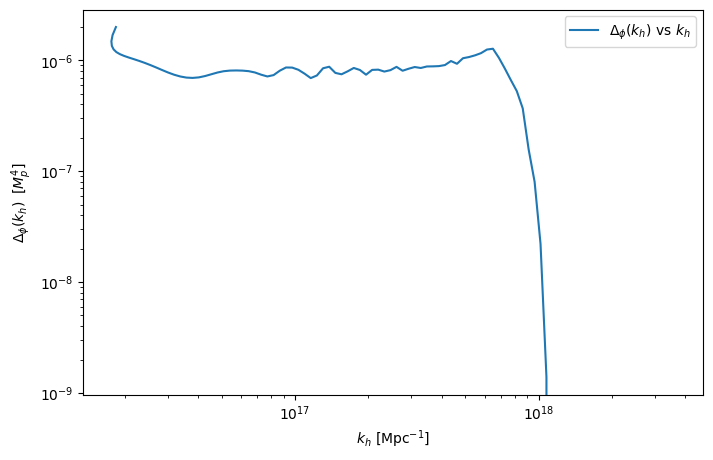

In [265]:
# Storage for kh and corresponding Deltaphi(kh)
kh_values = []
Deltaphi_at_kh = []
indices_to_plot = [i for i in range(0, int(len(blocks)/2), 1)]

# Loop through the selected blocks and plot
for idx in indices_to_plot:
    block = blocks[idx]
    x, y1, y2, y3 = process_block(block)  # Extract data from the block
    k = np.array(x) * omega_star
    kscaled = k * 0.05 / k[0]
    Deltaphi = np.array(y1) * f_star**2 / M_p**2

    # Time-dependent kh and Ne values
    current_time = times[idx]
    kh = kh_t(current_time)
    Ne = np.log(a_t(current_time))

    # Univariate spline to interpolate Deltaphi vs k
    Deltaphi_spline = UnivariateSpline(k, Deltaphi, s=0)

    # Evaluate Deltaphi at the corresponding kh
    Deltaphi_kh = Deltaphi_spline(kh)

    # Store values for later plotting
    kh_values.append(kh)
    Deltaphi_at_kh.append(Deltaphi_kh)

# Now plot Deltaphi(kh) vs kh
plt.figure(figsize=(8, 5))
plt.plot(kh_values, Deltaphi_at_kh, '-', label=r'$\Delta_\phi(k_h)$ vs $k_h$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$k_h$ [Mpc$^{-1}$]')
plt.ylabel(r'$\Delta_\phi(k_h)\;\; [M_p^4]$')
plt.legend()
plt.show()


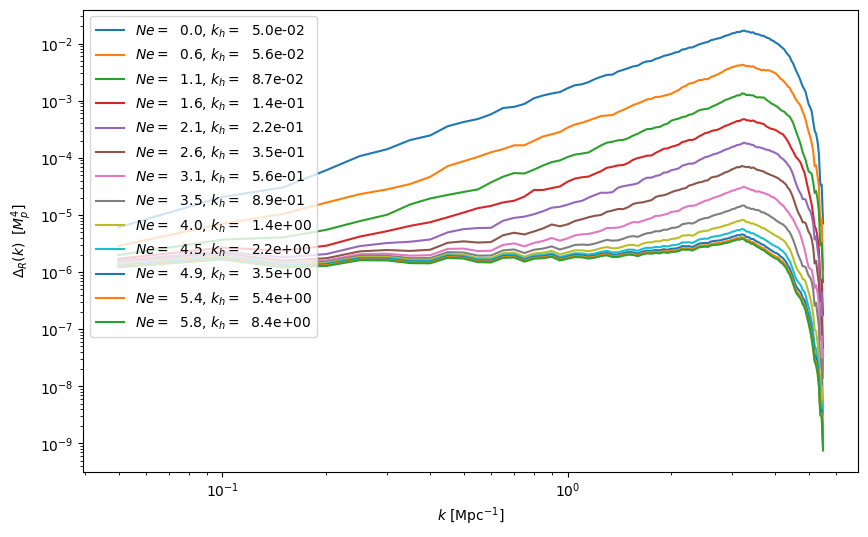

In [266]:
# Create a figure
plt.figure(figsize=(10, 6))
indices_to_plot = [i for i in range(0, int(len(blocks)/2), 8)]
# Loop through the selected blocks and plot
for idx in indices_to_plot:
    block = blocks[idx]
    x, y1, y2, y3 = process_block(block)  # Extract data from the block
    k = np.array(x) * omega_star
    kscaled = k * 0.05/k[0]
    DeltaR = np.array(y1) * f_star**2/M_p**2 * np.abs(Hubble_t(times[idx])/(dphi_t(times[idx])/M_p**2))
    plt.plot(kscaled, DeltaR, label=f'$Ne =$  {np.log(a_t(times[idx])):.1f}, $k_h =$  {kh_t(times[idx])* 0.05/kh_t(0):.1e}')
    DeltaR_k = UnivariateSpline(k,DeltaR,s=0)

# Customize plot
plt.xlabel(r'$k$ [Mpc$^{-1}]$')
plt.ylabel(r'$\Delta_R(k)\;\; [M_p^4]$')
plt.xscale('log')
plt.yscale('log')
plt.legend()

# Show the plot
plt.show()

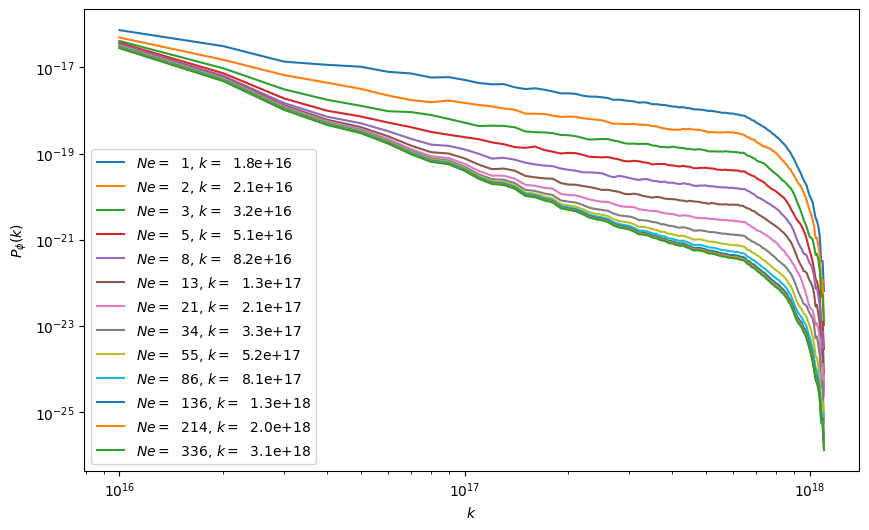

In [267]:
# Create a figure
plt.figure(figsize=(10, 6))

# Loop through the selected blocks and plot
for idx in indices_to_plot:
    block = blocks[idx]
    x, y1, y2, y3 = process_block(block)  # Extract data from the block
    k = np.array(x) * omega_star
    P_phi = np.array(y1) * f_star**2 * 2 * np.pi**2 / k**3
    plt.plot(k, P_phi, label=f'$Ne =$  {a_t(times[idx]):.0f}, $k =$  {kh_t(times[idx]):.1e}')
    
# Customize plot
plt.xlabel(r'$k$')
plt.ylabel(r'$P_\phi(k)$')
plt.xscale('log')
plt.yscale('log')
plt.legend()

# Show the plot
plt.show()

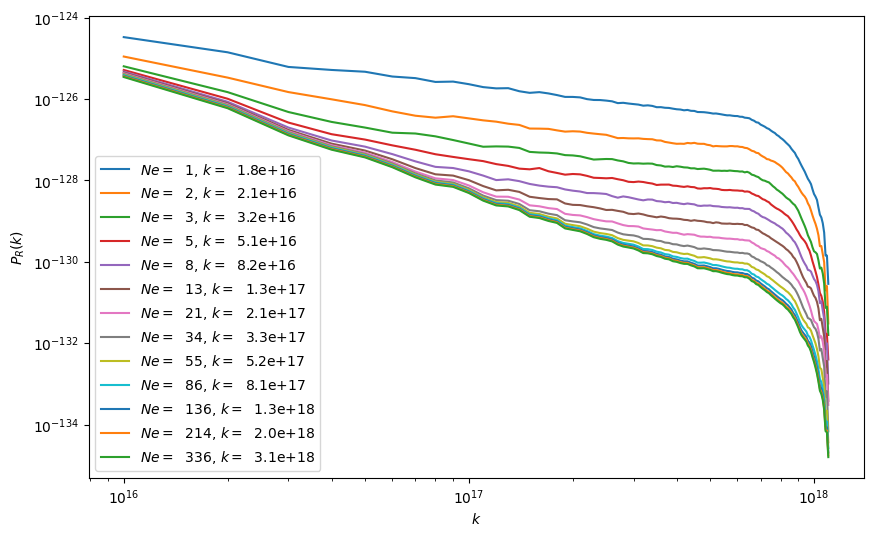

In [268]:
# Create a figure
plt.figure(figsize=(10, 6))

# Loop through the selected blocks and plot
for idx in indices_to_plot:
    block = blocks[idx]
    x, y1, y2, y3 = process_block(block)  # Extract data from the block
    k = np.array(x) * omega_star
    Pow_R = np.array(y1) * f_star**2/M_p**2 * (Hubble_t(times[idx])/dphi_t(times[idx]))**2 * 2 * np.pi**2 / k**3
    plt.plot(k, Pow_R, label=f'$Ne =$  {a_t(times[idx]):.0f}, $k =$  {kh_t(times[idx]):.1e}')  # Use time as label

# Customize plot
plt.xlabel(r'$k$')
plt.ylabel(r'$P_R(k)$')
plt.xscale('log')
plt.yscale('log')
plt.legend()

# Show the plot
plt.show()

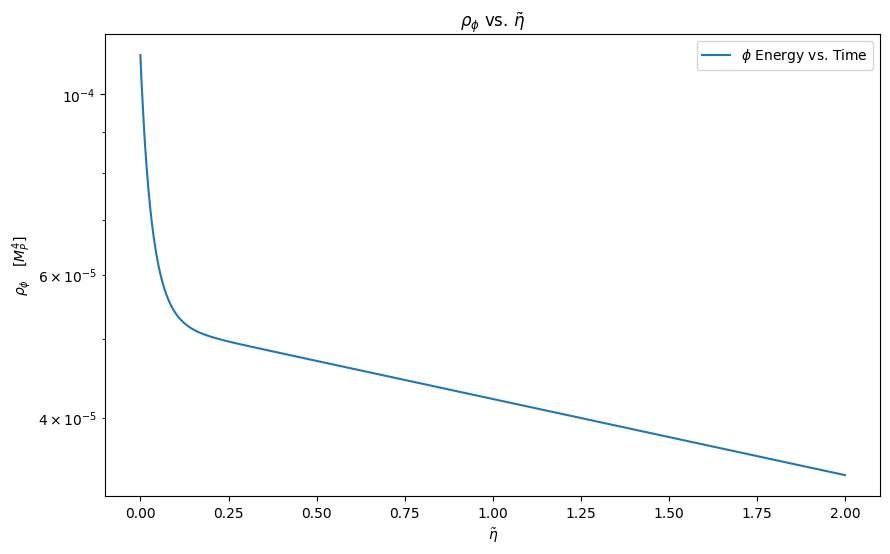

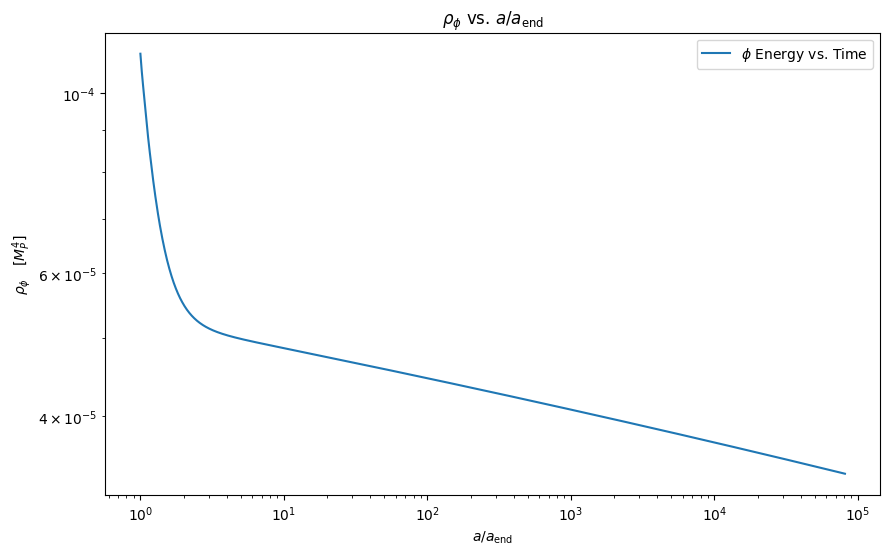

In [269]:
## Volume averaged energy density

import matplotlib.pyplot as plt

# Function to process the file and extract columns
def read_and_process_file(file_path):
    with open(file_path, 'r') as f:
        # Read the entire file and split into lines
        lines = f.readlines()
    
    # Convert each line to a list of floats (each line is a row)
    data = [list(map(float, line.split())) for line in lines]
    
    # Transpose to columns
    return list(zip(*data))  # Each column is now a list

# Read and process the data
avg_energies = read_and_process_file(path + 'average_energies.txt')
avg_sf = read_and_process_file(path + 'average_scale_factor.txt')

# Assuming the first column is x and the second column is y
x = avg_energies[0]  # First column (x)
y = [sum(x) * (f_star * omega_star / M_p**2)**2 for x in zip(avg_energies[1], avg_energies[2], avg_energies[5])]

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='$\phi$ Energy vs. Time')

# Customize the plot
plt.xlabel(r'$\tilde{\eta}$')
plt.ylabel(r'$\rho_\phi\quad [M_P^4]$')
plt.title(r'$\rho_\phi$ vs. $\tilde{\eta}$')
plt.legend()
plt.yscale('log')
# Show the plot
plt.show()

# Assuming the first column is x and the second column is y
x = avg_sf[1]  # First column (x)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='$\phi$ Energy vs. Time')

# Customize the plot
plt.xlabel(r'$a/a_\text{end}$')
plt.ylabel(r'$\rho_\phi\quad [M_P^4]$')
plt.title(r'$\rho_\phi$ vs. $a/a_\text{end}$')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.show()

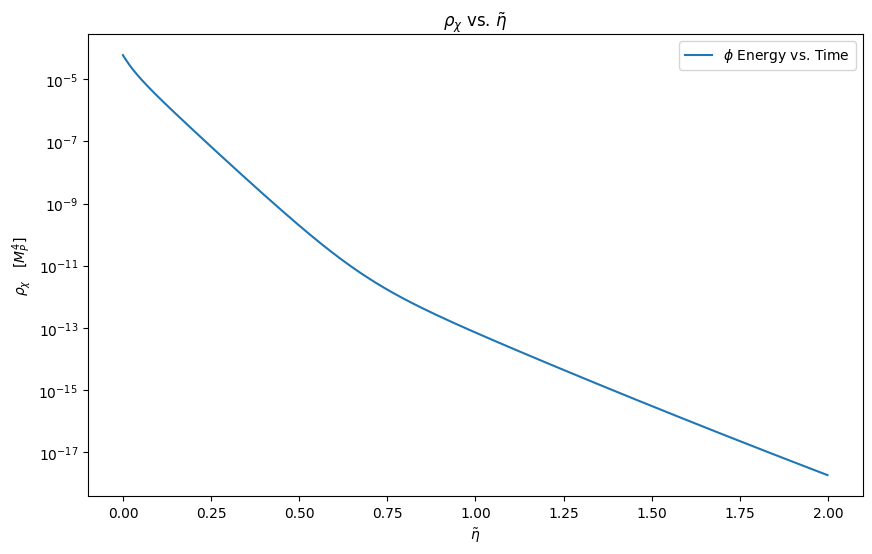

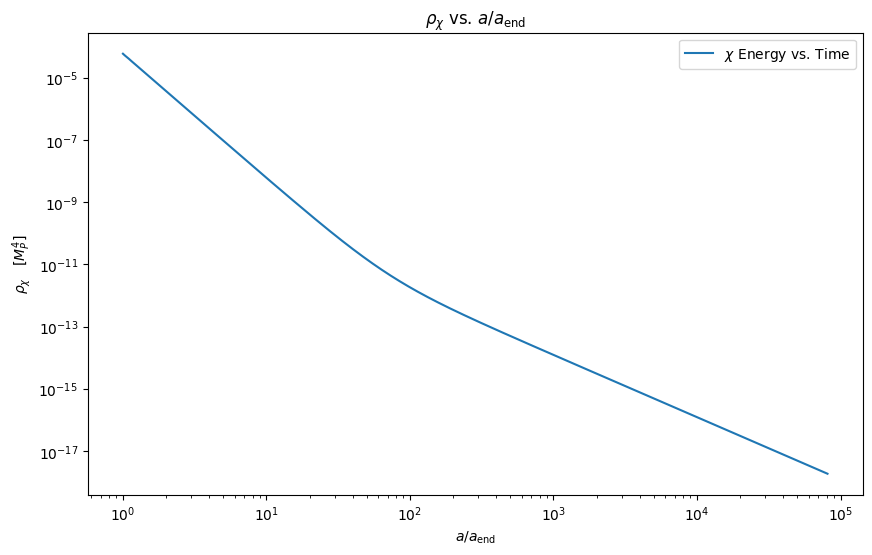

In [270]:
import matplotlib.pyplot as plt

# Function to process the file and extract columns
def read_and_process_file(file_path):
    with open(file_path, 'r') as f:
        # Read the entire file and split into lines
        lines = f.readlines()
    
    # Convert each line to a list of floats (each line is a row)
    data = [list(map(float, line.split())) for line in lines]
    
    # Transpose to columns
    return list(zip(*data))  # Each column is now a list

# Read and process the data
avg_energies = read_and_process_file(path + 'average_energies.txt')
avg_sf = read_and_process_file(path + 'average_scale_factor.txt')

# Assuming the first column is x and the second column is y
x = avg_energies[0]  # First column (x)
y = [sum(q) * (f_star * omega_star / M_p**2)**2 for q in zip(avg_energies[3], avg_energies[4], avg_energies[6])]

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='$\phi$ Energy vs. Time')

# Customize the plot
plt.xlabel(r'$\tilde{\eta}$')
plt.ylabel(r'$\rho_\chi\quad [M_P^4]$')
plt.title(r'$\rho_\chi$ vs. $\tilde{\eta}$')
plt.legend()
plt.yscale('log')
# Show the plot
plt.show()

# Assuming the first column is x and the second column is y
x = avg_sf[1]  # First column (x)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='$\chi$ Energy vs. Time')

# Customize the plot
plt.xlabel(r'$a/a_\text{end}$')
plt.ylabel(r'$\rho_\chi\quad [M_P^4]$')
plt.title(r'$\rho_\chi$ vs. $a/a_\text{end}$')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.show()

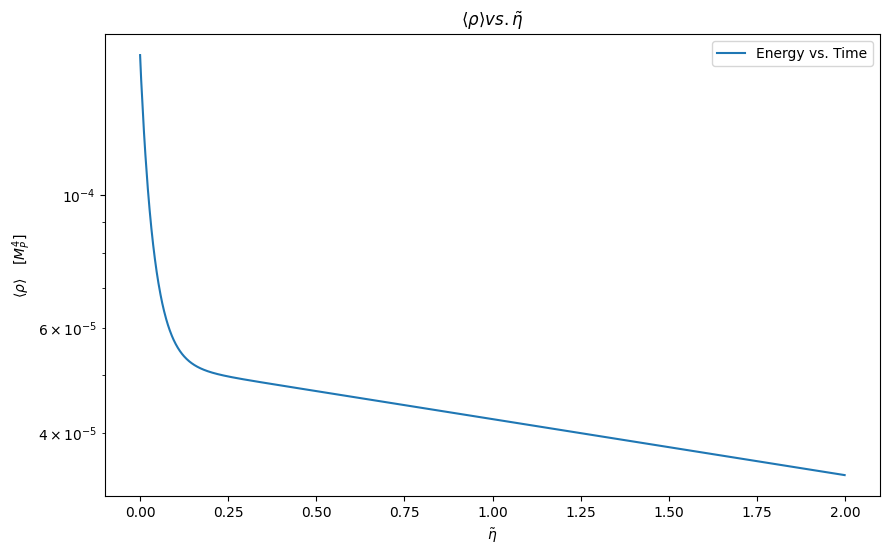

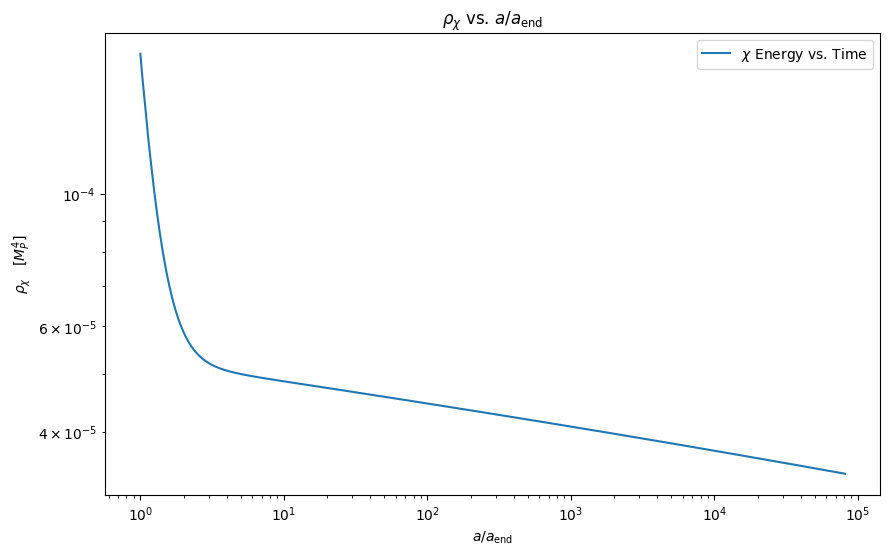

In [271]:
## Dimensionless program energy

import matplotlib.pyplot as plt

# File path to your data file
file_path = 'average_energies.txt'

# Function to process the file and extract columns
def read_and_process_file(file_path):
    with open(file_path, 'r') as f:
        # Read the entire file and split into lines
        lines = f.readlines()
    
    # Convert each line to a list of floats (each line is a row)
    data = [list(map(float, line.split())) for line in lines]
    
    # Transpose to columns
    return list(zip(*data))  # Each column is now a list

# Read and process the data
data = read_and_process_file(path + file_path)

# Assuming the first column is x and the second column is y
x = data[0]  # First column (x)
y = [d * (f_star * omega_star / M_p**2)**2 for d in data[7]] # Second column (y)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Energy vs. Time')

# Customize the plot
plt.xlabel(r'$\tilde{\eta}$')
plt.ylabel(r'$\langle\rho\rangle\quad [M_P^4]$')
plt.title(r'$\langle\rho\rangle vs. \tilde{\eta}$')
plt.legend()
plt.yscale('log')
plt.show()


# Assuming the first column is x and the second column is y
x = avg_sf[1]  # First column (x)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='$\chi$ Energy vs. Time')

# Customize the plot
plt.xlabel(r'$a/a_\text{end}$')
plt.ylabel(r'$\rho_\chi\quad [M_P^4]$')
plt.title(r'$\rho_\chi$ vs. $a/a_\text{end}$')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.show()